In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd
import numpy as np
from random import shuffle
import random
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from wordcloud import  STOPWORDS 
import numpy as np 
import matplotlib.pyplot as plt
import re
import os
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from tqdm.notebook import tqdm
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore') 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn. preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,recall_score,precision_score,f1_score


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,GRU
import tensorflow as tf

In [3]:
df = pd.read_csv("news-data.csv")
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
df.describe()

,category,text
count,2225,2225
unique,5,2126
top,sport,europe backs digital tv lifestyle how people r...
freq,511,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [6]:
print("The shape of the dataset-------->",df.shape)
print("The number of null values ------>")
print(df.isnull().sum())
column = df.columns
print("The column present there-------->",column)

The shape of the dataset--------> (2225, 2)
The number of null values ------>
category    0
text        0
dtype: int64
The column present there--------> Index(['category', 'text'], dtype='object')


In [7]:
print("The total number category present here------------->",df['category'].nunique())
category=df['category'].value_counts()
print(category)

The total number category present here-------------> 5
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64


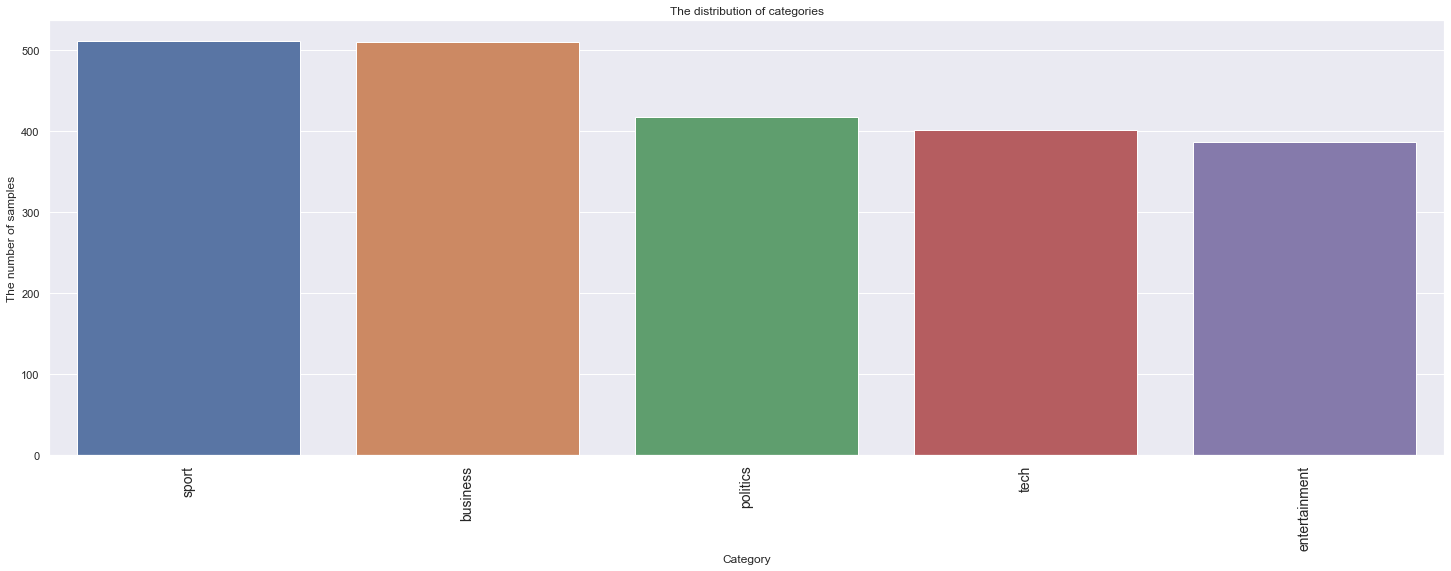

In [8]:
plt.figure(figsize=(25,8))
sns.barplot(x=category.index,y=category.values)
plt.title("The distribution of categories")
plt.xlabel("Category")
plt.ylabel("The number of samples")

plt.xticks(rotation=90,fontsize = 14)
plt.show()

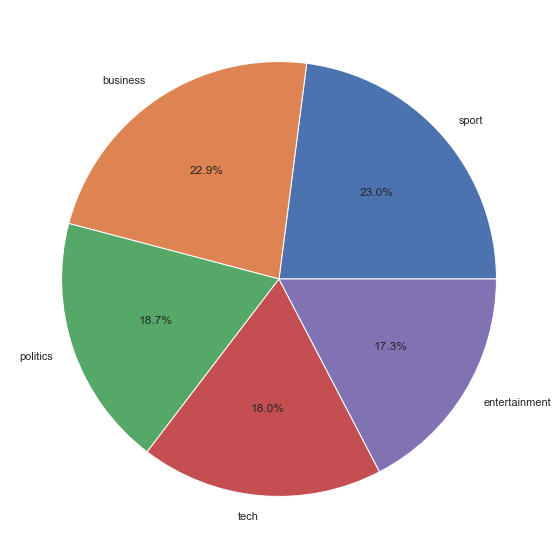

<Figure size 432x288 with 0 Axes>

In [9]:
plt.figure(figsize=(10,10))
plt.pie(category.values, autopct="%1.1f%%", labels=category.index)
plt.show()
plt.savefig(r"./category_pie.png")

In [10]:
df.duplicated().sum() 

99

In [11]:
df.drop_duplicates(keep='last',inplace=True)

In [12]:
df.drop_duplicates()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
5,politics,howard hits back at mongrel jibe michael howar...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [13]:
df[df['text'] == '']

,category,text


In [14]:
total_categories = df.category.unique()
corpus = [' '.join(df[(df.category==categories)].text.tolist()) for categories in total_categories]
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer( stop_words=STOPWORDS, ngram_range=(1, 3))
X = cv.fit_transform(corpus)
X = X.toarray()
bow=pd.DataFrame(X, columns = cv.get_feature_names())
bow.index=total_categories

In [15]:
"""corpus=[]
for i in range(100000):
    text = data.iloc[i,1]
    
    text = text.lower()
    text = re.sub('[^a-z0-9]',' ',text)
    text = text.split()
    
    s = PorterStemmer()
    text = [s.stem(word) for word in text if not word in set(stopwords.words('english')) ]
    text = ' '.join(text)
    corpus.append(text)
    
    if i%1000==0:
        print(i,end='->')"""


"corpus=[]\nfor i in range(100000):\n    text = data.iloc[i,1]\n    \n    text = text.lower()\n    text = re.sub('[^a-z0-9]',' ',text)\n    text = text.split()\n    \n    s = PorterStemmer()\n    text = [s.stem(word) for word in text if not word in set(stopwords.words('english')) ]\n    text = ' '.join(text)\n    corpus.append(text)\n    \n    if i%1000==0:\n        print(i,end='->')"

In [16]:
"""corpus = pd.read_csv('../input/corpus/corpus.csv')
corpus"""

"corpus = pd.read_csv('../input/corpus/corpus.csv')\ncorpus"

In [17]:
X = df['text']
label = LabelEncoder()
y = label.fit_transform(df['category'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state=2)

In [18]:
print("The X_train shape----->",X_train.shape)
print('The X_text shape------>',X_test.shape)
print("THe y_train shape----->",y_train.shape)
print("The y_test shape------>",y_test.shape)

The X_train shape-----> (1913,)
The X_text shape------> (213,)
THe y_train shape-----> (1913,)
The y_test shape------> (213,)


In [19]:
vecto1 =  TfidfVectorizer(stop_words='english',max_df = 0.99,min_df=10,
                                   ngram_range=(1, 2),lowercase=True, max_features=5000)
vecto1 = vecto1.fit(X_train)

X_train = vecto1.transform(X_train).toarray()
X_test = vecto1.transform(X_test).toarray()
X_train.shape

(1913, 5000)

In [20]:
print(vecto1.get_feature_names())

['000', '000 copies', '000 jobs', '000 new', '000 people', '000 year', '000m', '10', '10 000', '10 000m', '10 minutes', '10 years', '100', '100 000', '100m', '10bn', '11', '11 september', '110', '11bn', '12', '12 months', '120', '13', '14', '15', '15 years', '150', '150 000', '1500m', '16', '17', '17 year', '18', '18 months', '18 year', '19', '1960s', '1970', '1970s', '1980s', '1981', '1983', '1984', '1985', '1987', '1989', '1990s', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '19th', '1bn', '1m', '20', '20 000', '20 years', '200', '200 000', '2000', '2001', '2002', '2003', '2004', '2004 according', '2005', '2005 said', '2006', '2007', '2008', '2009', '200m', '2010', '20th', '21', '21st', '22', '22 year', '23', '233', '24', '25', '25 year', '250', '250 000', '26', '27', '27 february', '28', '28 year', '29', '2bn', '2m', '30', '30 000', '30 year', '300', '31', '31 year', '32', '33', '34', '35', '35bn', '36', '37', '38', '39', '3bn', '3d', '3g', '3m', '40', '40

In [21]:
tfidf_df = pd.DataFrame(X_train,columns = vecto1.get_feature_names())
tfidf_df.head(4)

,000,000 copies,000 jobs,000 new,000 people,000 year,000m,10,10 000,10 000m,...,young,young people,younger,youth,yuan,yugansk,yuganskneftegas,yukos,zealand,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.052425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035634,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
print("The X_train shape----->",X_train.shape)
print('The X_text shape------>',X_test.shape)
print("THe y_train shape----->",y_train.shape)
print("The y_test shape------>",y_test.shape)

The X_train shape-----> (1913, 5000)
The X_text shape------> (213, 5000)
THe y_train shape-----> (1913,)
The y_test shape------> (213,)


In [23]:
def classifier_scores(y_train,y_test, pred_train, pred_test):
    
    print()
    print("Train data accuracy score: ", accuracy_score(y_train,pred_train))    
    print("Test data accuracy score: ", accuracy_score(y_test,pred_test))
    print()
    print("Recall score on train data: ", recall_score(y_train,pred_train, average='macro'))
    print("Recall score on test data: ",recall_score( y_test,pred_test, average='macro'))
    print()
    
    print("Precision score on train data: ",precision_score(y_train,pred_train, average='macro'))
    print("Precision score on test data: ",precision_score(y_test,pred_test, average='macro'))
    print()
    print("F1 score on train data: ",f1_score(y_train,pred_train, average='macro'))
    print("F1 score on test data: ",f1_score(y_test,pred_test, average='macro'))

In [24]:
print("Multinamial NB----------------------------------->")
multinb = MultinomialNB()
multinb.fit(X_train , y_train)

y_train_pred = multinb.predict(X_train)
y_test_pred = multinb.predict(X_test)
classifier_scores(y_train,y_test,y_train_pred,y_test_pred)

Multinamial NB----------------------------------->

Train data accuracy score:  0.985363303711448
Test data accuracy score:  0.9577464788732394

Recall score on train data:  0.9848186883333975
Recall score on test data:  0.9509090909090909

Precision score on train data:  0.9849770582865288
Precision score on test data:  0.9474596000097202

F1 score on train data:  0.9848787604127288
F1 score on test data:  0.9490521323194312


In [25]:
dt = DecisionTreeClassifier()
dt.fit(X_train , y_train)

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
classifier_scores(y_train,y_test,y_train_pred,y_test_pred)


Train data accuracy score:  1.0
Test data accuracy score:  0.7746478873239436

Recall score on train data:  1.0
Recall score on test data:  0.7715194805194805

Precision score on train data:  1.0
Precision score on test data:  0.7630974655428563

F1 score on train data:  1.0
F1 score on test data:  0.7658989898269264


In [26]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train , y_train)

y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)
classifier_scores(y_train,y_test,y_train_pred,y_test_pred)


Train data accuracy score:  1.0
Test data accuracy score:  0.971830985915493

Recall score on train data:  1.0
Recall score on test data:  0.9707142857142858

Precision score on train data:  1.0
Precision score on test data:  0.9675055978504254

F1 score on train data:  1.0
F1 score on test data:  0.969036103772946


In [27]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train , y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
classifier_scores(y_train,y_test,y_train_pred,y_test_pred)


Train data accuracy score:  1.0
Test data accuracy score:  0.9483568075117371

Recall score on train data:  1.0
Recall score on test data:  0.9407662337662337

Precision score on train data:  1.0
Precision score on test data:  0.9481875285725838

F1 score on train data:  1.0
F1 score on test data:  0.9438627263460646


In [28]:
words = []
for i in df.text.values:
    words.append(i.split())
words[:5]

[['tv',
  'future',
  'in',
  'the',
  'hands',
  'of',
  'viewers',
  'with',
  'home',
  'theatre',
  'systems',
  'plasma',
  'high-definition',
  'tvs',
  'and',
  'digital',
  'video',
  'recorders',
  'moving',
  'into',
  'the',
  'living',
  'room',
  'the',
  'way',
  'people',
  'watch',
  'tv',
  'will',
  'be',
  'radically',
  'different',
  'in',
  'five',
  'years',
  'time.',
  'that',
  'is',
  'according',
  'to',
  'an',
  'expert',
  'panel',
  'which',
  'gathered',
  'at',
  'the',
  'annual',
  'consumer',
  'electronics',
  'show',
  'in',
  'las',
  'vegas',
  'to',
  'discuss',
  'how',
  'these',
  'new',
  'technologies',
  'will',
  'impact',
  'one',
  'of',
  'our',
  'favourite',
  'pastimes.',
  'with',
  'the',
  'us',
  'leading',
  'the',
  'trend',
  'programmes',
  'and',
  'other',
  'content',
  'will',
  'be',
  'delivered',
  'to',
  'viewers',
  'via',
  'home',
  'networks',
  'through',
  'cable',
  'satellite',
  'telecoms',
  'companies',


In [29]:
import gensim
EMBEDDING_DIM = 200
w2v_model = gensim.models.Word2Vec(sentences = words , size=EMBEDDING_DIM , window = 5 , min_count = 1)

In [30]:
len(w2v_model.wv.vocab)

43771

In [31]:
tokenizer = text.Tokenizer(num_words=35000)
tokenizer.fit_on_texts(words)
tokenized_train = tokenizer.texts_to_sequences(words)
x = sequence.pad_sequences(tokenized_train, maxlen = 20)

In [32]:
vocab_size = len(tokenizer.word_index) + 1

In [33]:
def get_weight_matrix(model, vocab):
    vocab_size = len(vocab) + 1
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix

In [34]:
embedding_vectors = get_weight_matrix(w2v_model, tokenizer.word_index)

# Training  word2vec model

In [35]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=20, trainable=True))
model.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.3 , dropout = 0.3,return_sequences = True)))
model.add(Bidirectional(GRU(units=32 , recurrent_dropout = 0.1 , dropout = 0.1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['acc'])

del embedding_vectors

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 200)           8754400   
_________________________________________________________________
bidirectional (Bidirectional (None, 20, 256)           336896    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                55680     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 9,147,041
Trainable params: 9,147,041
Non-trainable params: 0
_________________________________________________________________


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, df.text , test_size = 0.3 , random_state = 0) 

In [38]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train, batch_size = 128 , validation_data = (x_test,y_test) , epochs = 3)


Epoch 1/3
469/469 [==============================] - 3s 6ms/step - loss: 0.6935 - acc: 0.8031 - val_loss: 0.1915 - val_acc: 0.9459
Epoch 2/3
469/469 [==============================] - 1s 2ms/step - loss: 0.2042 - acc: 0.9414 - val_loss: 0.1396 - val_acc: 0.9580
Epoch 3/3
469/469 [==============================] - 1s 2ms/step - loss: 0.1531 - acc: 0.9558 - val_loss: 0.1141 - val_acc: 0.9663


In [39]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(x_test,y_test)[1]*100)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.1016 - acc: 0.9716
Accuracy of the model on Training Data is -  97.16333150863647
313/313 [==============================] - 0s 933us/step - loss: 0.1141 - acc: 0.9663
Accuracy of the model on Testing Data is -  96.63000106811523


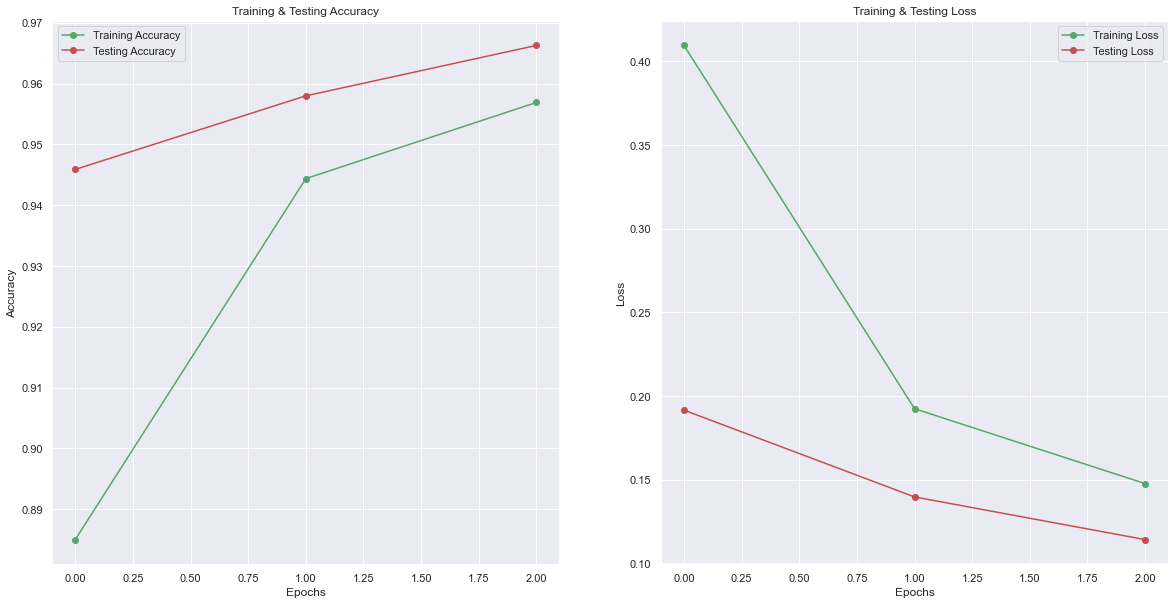

In [40]:
epochs = [i for i in range(3)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['acc']
train_loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [41]:
pred = model.predict_classes(x_test)
pred[:5]

array([7, 2, 1, 0, 4], dtype=int64)

In [42]:
cm = confusion_matrix(y_test,pred)
cm

array([[ 969,    0,    1,    2,    0,    2,    3,    1,    2,    0],
       [   0, 1125,    2,    1,    0,    1,    3,    0,    3,    0],
       [   7,    1,  986,   10,    4,    1,    5,    7,    9,    2],
       [   0,    0,    2,  986,    0,    6,    0,    8,    5,    3],
       [   1,    0,    6,    1,  933,    0,    3,    4,    3,   31],
       [   3,    1,    0,   13,    1,  855,    7,    1,    9,    2],
       [   8,    3,    1,    2,    4,   11,  924,    0,    5,    0],
       [   0,    9,   15,    6,    0,    1,    0,  990,    0,    7],
       [   3,    2,    4,   16,    2,    3,    5,    8,  926,    5],
       [   4,    6,    0,   12,    5,    2,    1,    6,    4,  969]],
      dtype=int64)

# Glove


In [43]:
x_train,x_test,y_train,y_test = train_test_split(df.text,df.category, test_size = 0.3 , random_state = 0)

In [44]:
max_features = 35000
maxlen = 200

In [45]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [46]:
tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [47]:
EMBEDDING_FILE = 'D:/glove.6B.100d.txt'

In [48]:
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE,encoding="utf8"))

In [49]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]



word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

In [50]:
batch_size = 128
epochs = 3
embed_size = 100

In [51]:
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(nb_words, output_dim=embed_size, weights=[embedding_matrix], input_length=200, trainable=True))
#LSTM 
model.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.5 , dropout = 0.5)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['acc'])

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 100)          2547700   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 256)               234496    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 2,782,453
Trainable params: 2,782,453
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train, batch_size = 128 , validation_data = (x_test,y_test) , epochs = 3)


Epoch 1/3
469/469 [==============================] - 2s 3ms/step - loss: 0.6828 - acc: 0.8031 - val_loss: 0.1899 - val_acc: 0.9437
Epoch 2/3
239/469 [==============>...............] - ETA: 0s - loss: 0.2078 - acc: 0.9405

In [ ]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(x_test,y_test)[1]*100)